```
Hex 	RGB
#05085a 	(5,8,90)
#d2d2d2 	(210,210,210)
#6262bc 	(98,98,188)
#b4e9f8 	(180,233,248)
#262525 	(38,37,37)
```

Livros disponiveis:
```
array(['gênesis', 'êxodo', 'levítico', 'números', 'deuteronômio', 'josué',
       'juízes', 'rute', 'i samuel', 'ii samuel', 'i reis', 'ii reis',
       'i crônicas', 'ii crônicas', 'ii cronicas', 'esdras', 'neemias',
       'ester', 'jó', 'salmos', 'provérbios', 'eclesiastes',
       'cântico dos cânticos', 'isaías', 'jeremias',
       'lamentações de jeremias', 'ezequiel', 'daniel', 'oséias', 'joel',
       'juízos contra os vizinhos de', 'amós', 'obadias', 'jonas',
       'miquéias', 'naum', 'habacuque', 'sofonias', 'ageu', 'zacarias',
       'malaquias', 'mateus', 'marcos', 'lucas', 'joão', 'atos',
       'romanos', 'i corintios', 'ii corintios', 'gálatas', 'efésios',
       'filipenses', 'colossenses', 'i tessalonicenses',
       'ii tessalonicenses', 'i timóteo', 'ii timóteo', 'tito', 'filemom',
       'hebreus', 'tiago', 'i pedro', 'ii pedro', 'i joão', 'ii joão',
       'iii joão', 'judas', 'apocalipse'], dtype=object)
```

In [1]:
LIVROS_DE_PESQUISA = [ 'romanos', 'i corintios', 'ii corintios', 'gálatas', 'efésios',
       'filipenses', 'colossenses', 'i tessalonicenses',
       'ii tessalonicenses', 'i timóteo', 'ii timóteo', 'tito', 'filemom',
       'hebreus', 'tiago', 'i pedro', 'ii pedro', 'i joão', 'ii joão',
       'iii joão']

# <span style='color:#262525'> Análise textual da Bíblia </span>

## <span style='color:#6262bc'> Importação do arquivo </span>

In [2]:
%store -r __imp

In [3]:
__imp

The libraries have been loaded!


In [4]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
from wordcloud import WordCloud
import networkx as nx
import itertools
import numpy as np
from PIL import Image
from os import path
import random
import re

In [5]:
stopwords = set(list(nltk.corpus.stopwords.words('portuguese') ) + ['assim','é','antes','porque','pois'])
tokenizer = TreebankWordTokenizer()
re_letra = re.compile('\W')
with open('C:\\Work\\Python\\religious_work\\biblia-em-txt.txt',encoding='utf-8') as f:
    content = f.readlines()
    versos = []
    for i,l in enumerate(content):
        if l[0].isdigit():
            if l.strip().startswith('1 '):
                livro = ' '.join(content[i-1].strip().split(' ')[:-1]).lower()
                cap = content[i-1].strip().split(' ')[-1]
            texto = re_letra.sub(r' ',' '.join(l.split(' ')[1:]).lower()).strip()
            
            versos.append(
            {
                'livro' : livro,
                'capitulo' : cap,
                'verso' : l.split(' ')[0],
                'texto' : texto,
                'palavras' : [p for p in tokenizer.tokenize(texto) if p not in stopwords and p not in punctuation]
            }
            )
    df_b = pd.DataFrame(versos)
    


In [6]:
df_b = df_b[df_b.livro.isin(LIVROS_DE_PESQUISA)]    
df_b.head()

,capitulo,livro,palavras,texto,verso
27918,1,romanos,"[paulo, servo, jesus, cristo, chamado, ser, ap...",paulo servo de jesus cristo chamado para ser...,1
27919,1,romanos,"[havia, prometido, profetas, santas, escrituras]",que ele antes havia prometido pelos seus profe...,2
27920,1,romanos,"[acerca, filho, nasceu, descendência, davi, se...",acerca de seu filho que nasceu da descendênci...,3
27921,1,romanos,"[poder, declarado, filho, deus, segundo, espír...",e que com poder foi declarado filho de deus se...,4
27922,1,romanos,"[recebemos, graça, apostolado, amor, nome, obe...",pelo qual recebemos a graça e o apostolado po...,5


## <span style='color:#6262bc'> Visualização das palavras </span>

### <span style='color:#05085a'>Exploracao inicial</span>

In [7]:
todas_palavras = list(itertools.chain.from_iterable([pals for pals in df_b['palavras']]))
print('%i palavras diferentes.' %len(list(set(todas_palavras))))
print('%i palavras.' %len(todas_palavras))
df_p = pd.DataFrame(todas_palavras,columns=['palavra'])
c = df_p.reset_index().groupby('palavra').count().sort_values('index')
c.columns = ['contador']
c.sort_values('contador',ascending=False).head()


5882 palavras diferentes.
26605 palavras.


,contador
palavra,
deus,762
cristo,439
vós,404
senhor,331
jesus,261


In [8]:
df_b['qtd_palavras'] = df_b['palavras'].apply(lambda x: len(x))
df_b.groupby('livro').agg({'qtd_palavras' : ['sum', 'mean']})
print(sum(df_b['qtd_palavras']))

qtd_palavras           
                            sum       mean
livro                                     
colossenses                 930   9.789474
efésios                    1383   8.922581
filemom                     196   7.840000
filipenses                 1036   9.961538
gálatas                    1387   9.308725
hebreus                    3123  10.306931
i corintios                4043   9.251716
i joão                      958   9.123810
i pedro                    1138  10.838095
i tessalonicenses           872   9.797753
i timóteo                  1089   9.637168
ii corintios               2575  10.058594
ii joão                     131  10.076923
ii pedro                    739  12.114754
ii tessalonicenses          462   9.829787
ii timóteo                  773   9.313253
iii joão                    136   9.066667
romanos                    4058   9.371824
tiago                      1132  10.481481
tito                        444   9.652174

26605


### <span style='color:#05085a'> Wordcloud dos livros de pesquisa</span>

(-0.5, 1279.5, 928.5, -0.5)

<Figure size 432x288 with 0 Axes>

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


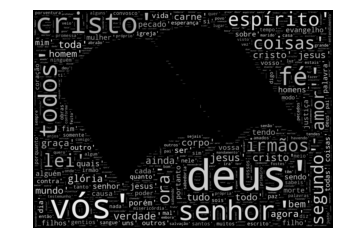

<Figure size 432x288 with 0 Axes>

In [9]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

mask = np.array(Image.open(path.join('C:\\Work\\', "1280px-Open_bible_01_01.png")))

wc = WordCloud(max_words=1000, mask=mask, margin=10,
               random_state=1).generate(str(todas_palavras))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("wordcloud_biblia.png")
plt.axis("off")
plt.figure()


### <span style='color:#05085a'> Grafo das palavras</span>

* Palavras no mesmo versículo.<br/> 
* 10 palavras mais relacionadas até a profundidade 2.<br/> 
* Verbos mais próximos


In [58]:
PALAVRAS_INTERESSE = ['deus','senhor','jesus','cristo','pecado','graça','salvação','perdoar']
PALAVRA_PESQUISADA = PALAVRAS_INTERESSE[4]


In [59]:
df_verbos = pd.read_csv('C:\\Work\\csv\\verbos.csv')
df_verbos.head()

,palavra,pessoa,tempo,verbo
0,indo,NaN,gerúndio,ir
1,ido,NaN,particípio passado,ir
2,vou,NaN,infinitivo,ir
3,vou,eu,presente,ir
4,vais,tu,presente,ir


In [60]:
#Combinando todas as palavras de cada verso duas a duas
arestas = []
for ps in df_b.palavras:
    arestas.extend(itertools.combinations(sorted(ps),2))


In [61]:
arestas[:5]

[('apóstolo', 'chamado'),
 ('apóstolo', 'cristo'),
 ('apóstolo', 'deus'),
 ('apóstolo', 'evangelho'),
 ('apóstolo', 'jesus')]

In [62]:
#monta um dataframe das arestas e ainda retira as duplicatas invertidas.
df_a = pd.DataFrame(arestas)
df_a.columns = ['p1','p2']
df_a = df_a[df_a.p1 != df_a.p2]
df_a = df_a.reset_index().groupby(['p1','p2'],as_index=False).count()
df_a.columns = ['p1','p2','qtd']
df_a['qtd_norm'] = (df_a.qtd - df_a.qtd.min()) / (df_a.qtd.max() - df_a.qtd.min())

In [63]:
df_vertices = df_a[((df_a.p1 == PALAVRA_PESQUISADA) | (df_a.p2 == PALAVRA_PESQUISADA)) & (df_a.qtd_norm > 0) ][['p1','p2','qtd_norm']].copy()
df_vertices = df_vertices.append(df_a[(df_a.p1.isin(df_vertices.p2.values)) & (df_a.qtd_norm > 0) ][['p1','p2','qtd_norm']])

print(df_vertices.shape)


(825, 3)


Grafo geral de todas as palavras relacionadas

In [64]:
def monta_grafo(df, palavra_psqd,col_qtd = 'qtd_norm', vai_salvar=True,nm_arq='grafo_geral.png'):
    l_t = list(df.itertuples(index=False,name=None))
    g = nx.Graph()
    g.add_weighted_edges_from(l_t)
    pesos = np.array([t[2] for t in l_t])
    pesos /= max(pesos)/5
    cores_arestas =  ['green' if  palavra_psqd in e   else 'blue' for e in list(g.edges)]
    cores_nos =  ['#d2d2d2' if n == palavra_psqd else '#6262bc' for n in list(g.nodes)]
    tam_nos =  [2400 if n == palavra_psqd else 1200 for n in list(g.nodes)]
    plt.figure(figsize=(20,20))
    #nx.draw(g,font_family='arial', node_color=cores_nos, with_labels=True,width=pesos)
    nx.draw_circular(g,edge_color=cores_arestas,font_size=24, node_color=cores_nos,node_size=tam_nos, with_labels=True,width=pesos)
    if vai_salvar:
        plt.draw()
        plt.savefig(nm_arq,dpi=1200)

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


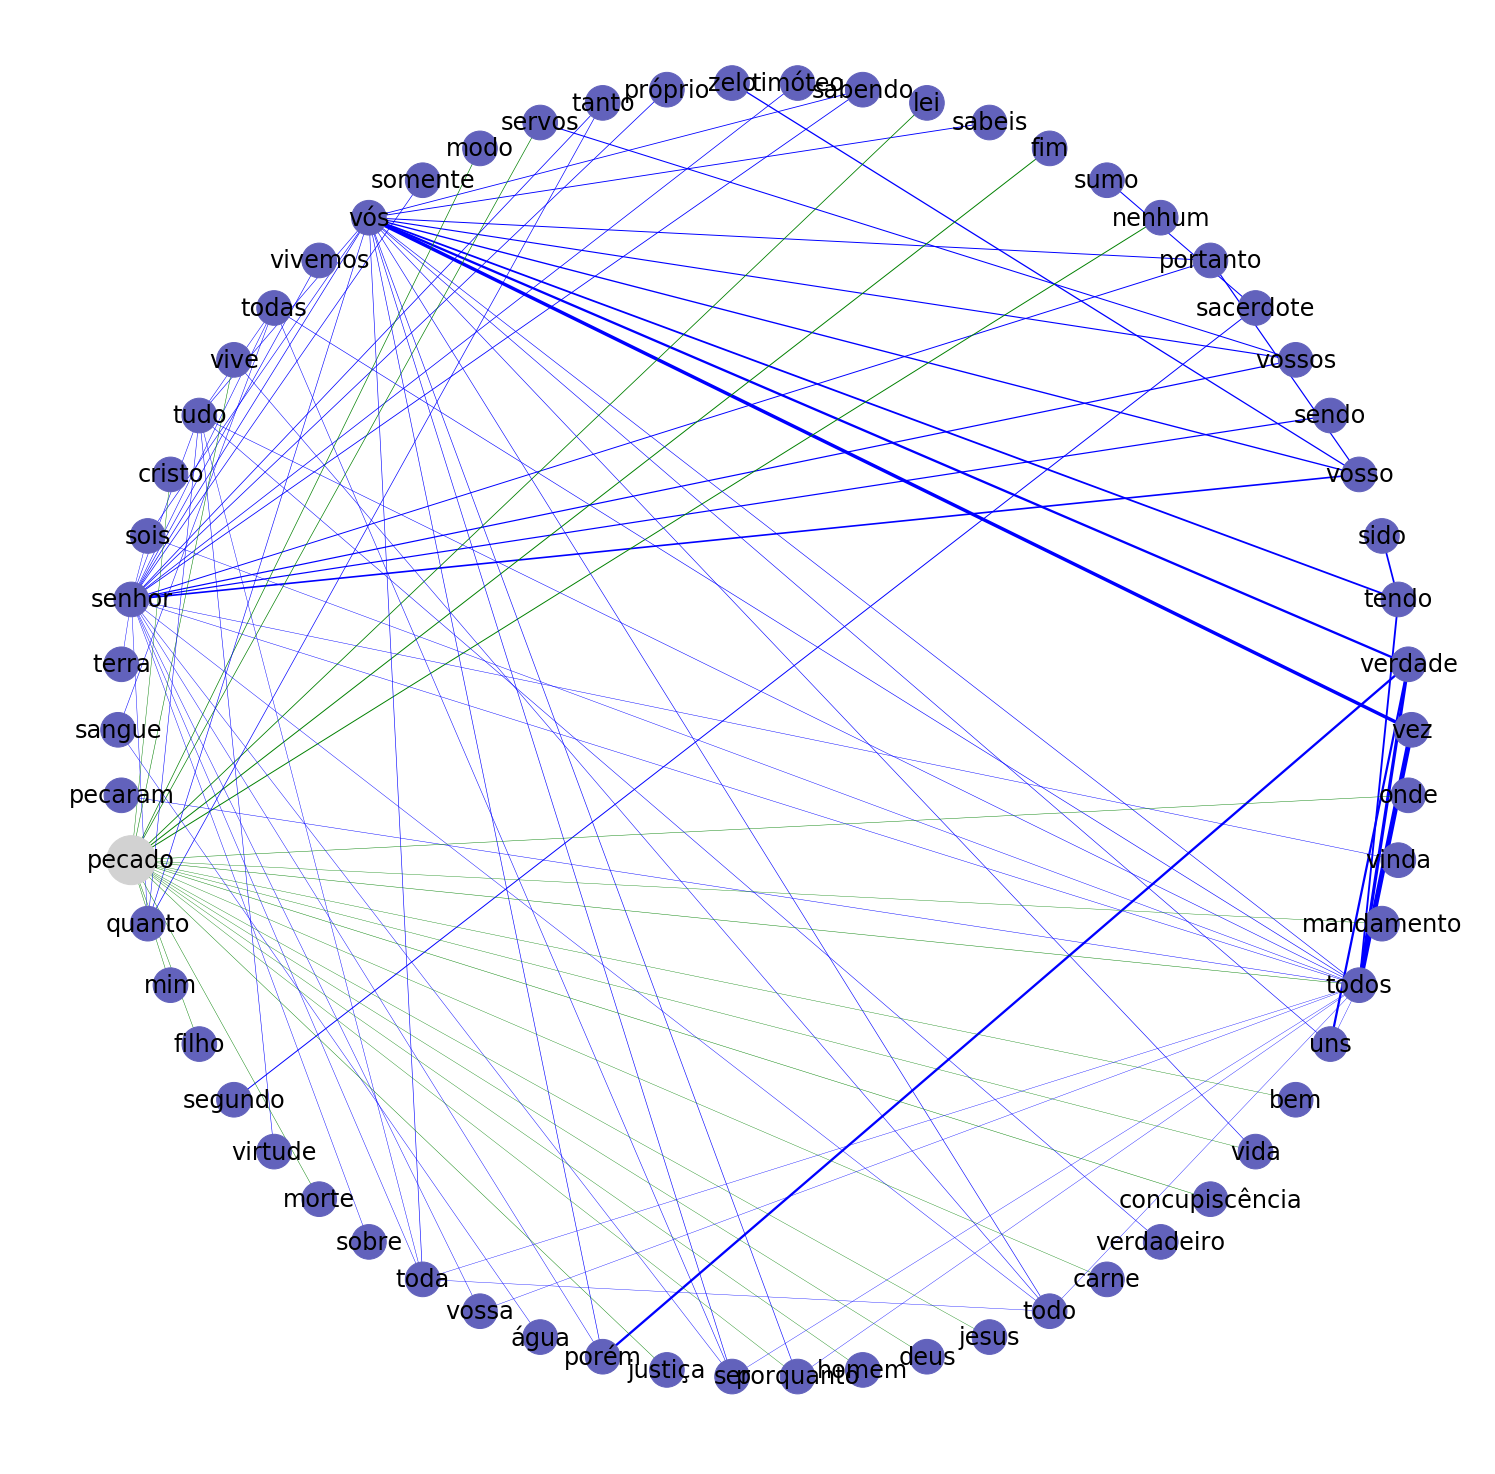

In [65]:
#palavras mais relacionadas.
QTD_PALAVRAS_REL = 100
monta_grafo( df_vertices.sort_values('qtd_norm',ascending=False).head(QTD_PALAVRAS_REL)[['p1','p2','qtd_norm']],PALAVRA_PESQUISADA,vai_salvar=False,nm_arq='grafo_palavras.png')


Grafo da relação com 400 verbos comuns no português. 
<p>Não foram utlizados os 20mil devido verbos estranhos como veiar, vidar, etc.</p>

In [66]:
verbos = df_verbos.verbo.unique()[:400]
#arrumando o dataframe de verbos.
verbos_dif = df_verbos[['palavra','verbo']].drop_duplicates()
verbos_dif = verbos_dif[verbos_dif.verbo.isin(verbos)]
df_av = pd.merge(df_a,verbos_dif,how='left',left_on='p1',right_on='palavra',copy=False)
df_av.drop('palavra',axis=1,inplace=True)
df_av.columns = ['verbo_p1' if c == 'verbo' else c for c in df_av.columns]
df_av = pd.merge(df_av,verbos_dif,how='left',left_on='p2',right_on='palavra',copy=False)
df_av.drop('palavra',axis=1,inplace=True)
df_av.columns = ['verbo_p2' if c == 'verbo' else c for c in df_av.columns]


array(['ir', 'ser', 'fazer', 'amar', 'estar'], dtype=object)

In [68]:
df_vertices = df_av[((df_av.p1 == PALAVRA_PESQUISADA) | (df_av.p2 == PALAVRA_PESQUISADA)) & (df_av.verbo_p2.notna())].copy()
df_vertices.head()
df_vertices.shape

,p1,p2,qtd,qtd_norm,verbo_p1,verbo_p2
83697,pecado,pedirá,2,0.004425,NaN,pedir
83700,pecado,permanece,1,0.000000,NaN,permanecer
83701,pecado,permaneceremos,1,0.000000,NaN,permanecer
83706,pecado,pode,1,0.000000,NaN,poder
83711,pecado,possa,1,0.000000,NaN,poder


(49, 6)

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


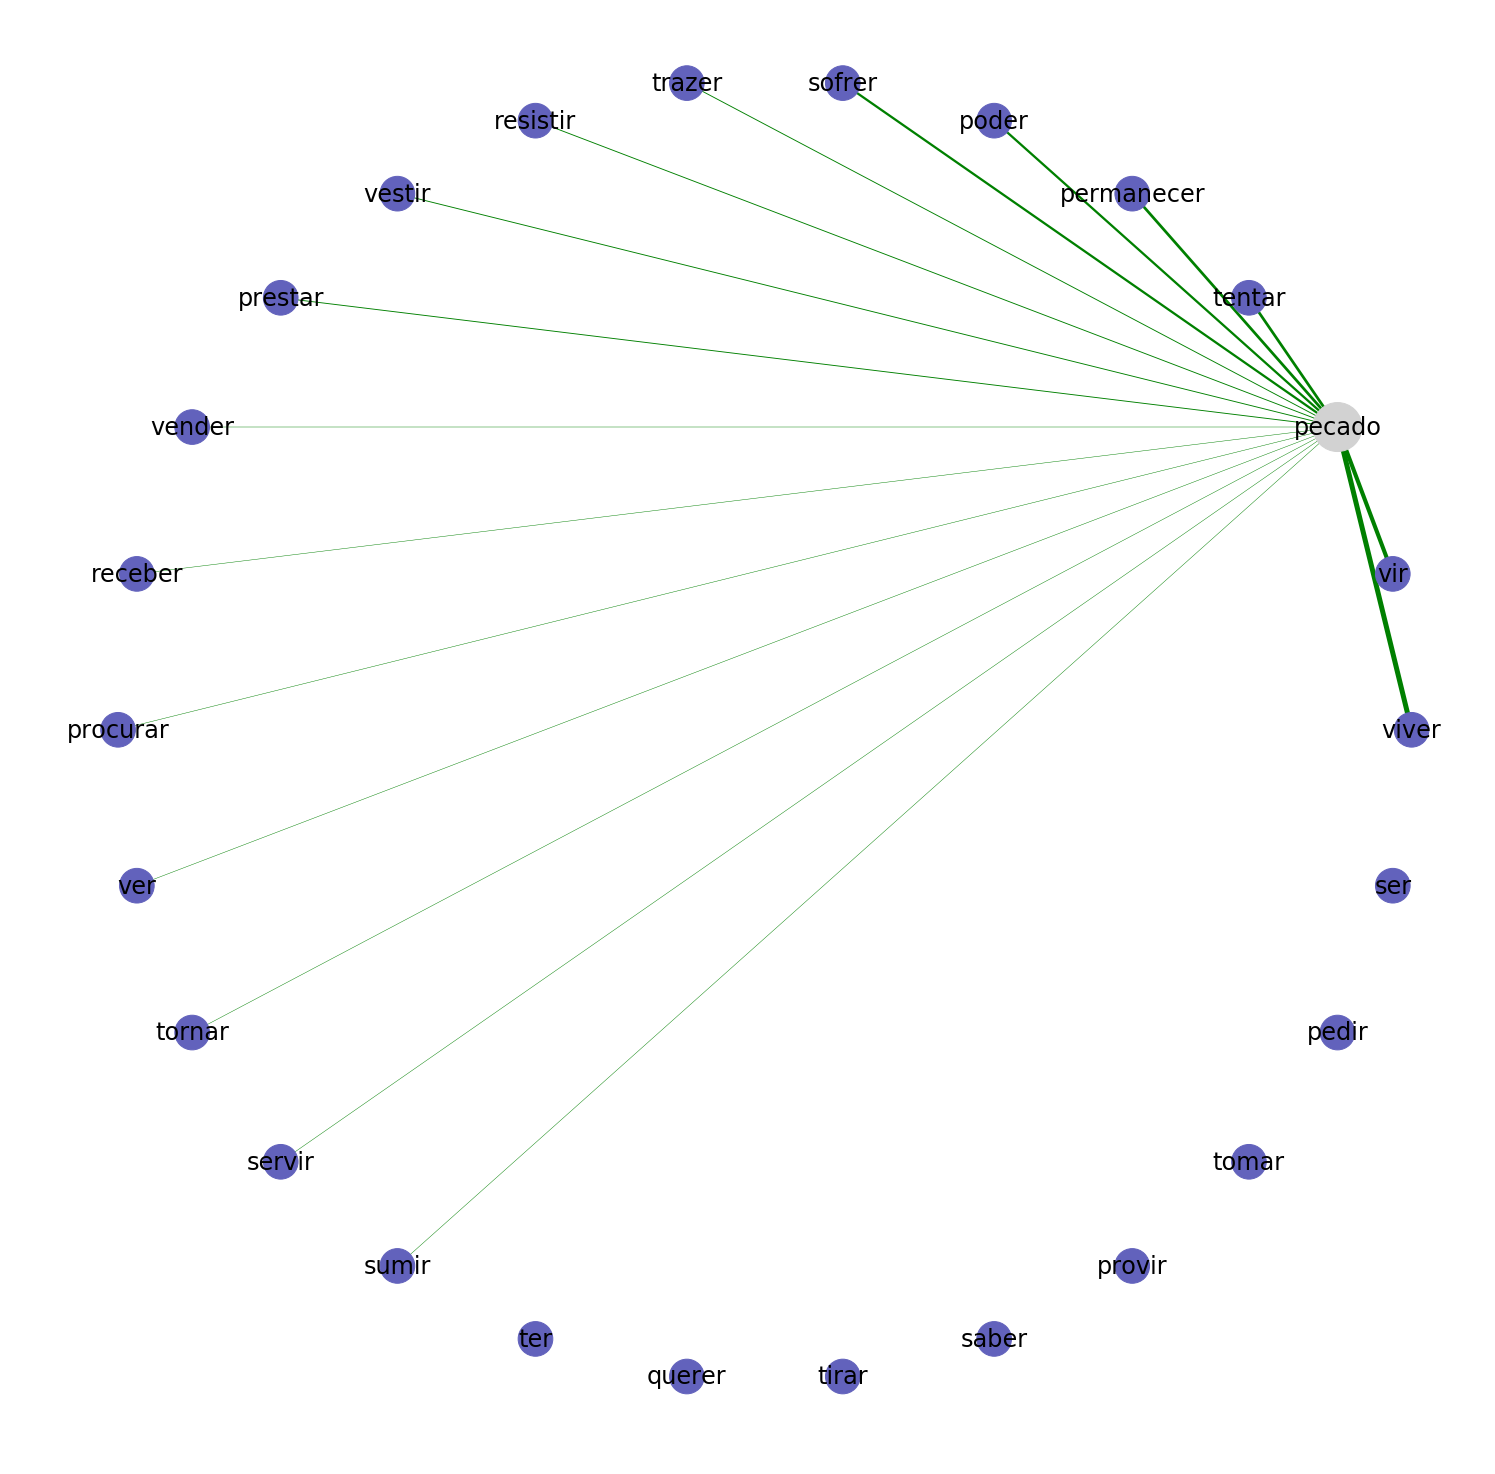

In [69]:
df_vertices = df_av[(df_av.p1 == PALAVRA_PESQUISADA) & (df_av.verbo_p2.notna())].copy().groupby(['p1','verbo_p2']).sum()[['qtd']].reset_index()
df_vertices.columns = ['p1','p2','qtd']
df_nivel2 = df_av[df_av['verbo_p1'].isin(df_vertices.p2.values) & (df_av.p2 != PALAVRA_PESQUISADA)].groupby(['verbo_p1','p2']).sum()[['qtd']].reset_index()
df_nivel2.columns = ['p1','p2','qtd']
df_vertices['qtd_norm'] = (df_vertices.qtd - df_vertices.qtd.min()) / (df_vertices.qtd.max() - df_vertices.qtd.min())
monta_grafo( df_vertices.sort_values('qtd_norm',ascending=False).head(QTD_PALAVRAS_REL).drop('qtd',axis=1),PALAVRA_PESQUISADA,vai_salvar=True,nm_arq='grafo_verbo.png')
